# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 3. Простой анализ данных.

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Телеграм не разрешает боту получать файлы более **20 Мб**. Если ваше решение весит больше, *заранее* разделите ноутбук на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания **используйте этот ноутбук в качестве основы, ничего не удаляя из него**. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**

---

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 60 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 2 &mdash; 80 баллов

---

In [ ]:
# Bot check

# HW_ID: fpmi_ad3
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.

На занятии мы уже <a href="https://miptstats.github.io/courses/ad_fivt/titanik.html" target="_blank">начинали</a> работать с датасетом Титаник. Сейчас ваша задача &mdash; на основе простого анализа предоставленных данных получить некоторое приближенное правило определения, выжил пассажир или нет.

#### 1. Подготовка данных

Загрузите данные с помощью `pandas`.

In [ ]:
import pandas as pd

train = pd.read_csv("train.csv")
train["Sex"] = (train["Sex"] == "female").apply(lambda x: int(x))
test = pd.read_csv("test.csv")

Разделите данные по строкам на две части случайным образом в соотношении 7:3. Первую часть мы будем называть *обучающей*, а вторую &mdash; *тестовой*.

In [ ]:
x_train = train.sample(int(train.shape[0] * 0.7))
x_val   = train.drop(x_train.index, axis = 0)

Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак. Примените к обеим частям таблицы функцию ниже

In [ ]:
features_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target_column = 'Survived'

def get_features_and_target(data):
    features = data[features_columns]
    target = data[target_column]
    return features, target

In [ ]:
x_train, y_train = get_features_and_target(x_train)
x_val,   y_val   = get_features_and_target(x_val) 



#### 2. Исследование

**Внимание.** Эта часть задачи должна выполняться *исключительно на обучающих данных*. За использование тестовых данных решение не будет оценено.

Проведите визуальный анализ данных чтобы понять, как различные признаки влияют на целевой. Исследовать можно не целиком обучающие данные, а разделить их на две части по одному из признаков, а далее рассматривать каждую часть отдельно. 

*Не забывайте про информативность и эстетичность графиков.*

In [ ]:
x_plot = x_train
x_plot["SibSp"] += x_plot["Parch"]
x_plot = x_plot.drop(["Parch"], axis = 1)

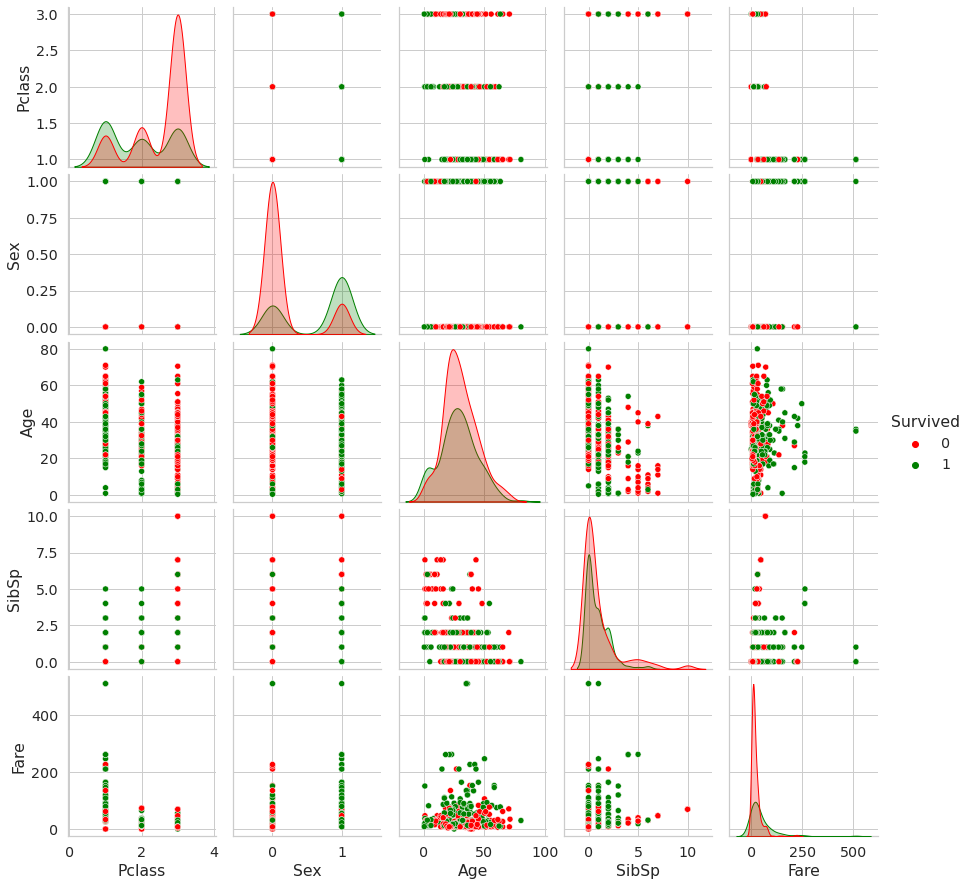

In [ ]:
sns.pairplot(pd.concat([x_plot, y_train], axis = 1), palette = {0 : "red", 1 : "green"}, hue = "Survived")

Выводы на основе вероятности выживания:

  1) шанс у женщины больше, чем у мужчины
  
  2) чем выше класс билета и тариф, тем выше шанс

  3) путешествие в одиночестве или в слишком большом количестве уменьшает шансы


#### 3. Классификация

На основе проведенного исследования предложите два разных правила в виде решающего дерева, пример которого можете посмотреть в презентации с первой лекции (классификация котиков). Никакие статистические методы использовать не требуется, только логику и графики.

В данной задаче достаточно, если первое дерево будет иметь максимальную глубину 2, а второе &mdash; глубину 1, и при этом не является поддеревом первого. *Примечание*: дерево из одного листа имеет глубину 0.

**Дерево 1:**

Если пассажирский класс выше 2, т.е. 1, то пассажир выжил

**Дерево 2:**

Если женщина или его цена билета выше 100, то пассажир выжил

Реализуйте полученные деревья по шаблону

In [ ]:
def tree_1(features):
    
    return (features["Pclass"] < 2).apply(lambda x: int(x))

def tree_2(features):

    return ((features["Sex"] == 1) | (features["Fare"] > 100)).apply(lambda x : int(x))

#### 4. Качество

Вспомним, что у нас имеется тестовая часть выборки. Самое время ее использовать для того, чтобы оценить, насколько хорошими получились деревья. Предложите какой-нибудь критерий качества.

*Замечание*. Не стоит пытаться искать, какие критерии существуют. В данном случае легко предложить адекватный критерий. Стандартные критерии мы разберем позже, но для начала лучше подумать самостоятельно.

**Критерий:**

Просто среднее, отношение правильных ко всем.

Реализуйте данный критерий по шаблону

In [ ]:
def criteria(target, predicted):
    
    return (target == predicted).mean()

Посчитайте качество полученных ранее деревьев.

*Примечание.* Полученные значения не влияют на оценку по задание. Оценивается только корректность и обоснованность решения, а также графики и выводы.

In [ ]:
print("first tree accuracy: ", criteria(y_val, tree_1(x_val)))
print("second tree accuracy: ", criteria(y_val, tree_2(x_val)))

first tree accuracy:  0.6716417910447762
second tree accuracy:  0.8171641791044776


**5. Метод ближайшего соседа**

В домашнем задании 1 вы уже реализовали функцию поиска ближайших соседей. Теперь давайте применим ее для решения нашей текущей задачи. 

Реализуйте функцию, которая для каждого объекта тестового набора данных найдет $k$ ближайших соседей из обучающего набора данных, и в качестве ответа возьмет наиболее часто встречающееся значение целевого признака среди найденных соседей. Обратите внимание, что соседей необходимо искать только среди объектов обучающего набора данных.

In [ ]:
def preprocessing_features(features):
    features["Pclass_1"] = features["Pclass"].apply(lambda x: int(x == 1))
    features["Pclass_2"] = features["Pclass"].apply(lambda x: int(x == 2))
    features["Pclass_3"] = features["Pclass"].apply(lambda x: int(x == 3))
    features = features.drop(["Pclass"], axis = 1)

    return features 


def knn(features, train_features, train_target, k=1):

    features_ = features
    train_features_ = train_features

    categorical_features = ["Sex", "Pclass"]
    default_values = pd.concat([train_features_[categorical_features].median(), train_features_.drop(categorical_features, axis = 1).mean()], axis = 0)

    features_ = features_.fillna(default_values)
    train_features_ = train_features_.fillna(default_values)

    
    features_ = preprocessing_features(features_)
    train_features_ = preprocessing_features(train_features_)
    
    indexes = features_.index

    features_ = np.array(features_.values)
    train_features_ = np.array(train_features_.values)
    
    
    train_features_ = np.repeat([train_features_], features_.shape[0], axis=0)
    diff = train_features_ - features_.reshape((features_.shape[0], 1, features_.shape[1]))
    diff *= diff
    curr_result = np.sum(diff, axis = 2)
    result = np.argsort(curr_result, axis=1)[:, :k]
    predicted = pd.DataFrame(np.arange(0, features.shape[0]), index = indexes, columns = ["predicted"])

    predicted["predicted"] = predicted["predicted"].apply(lambda index: int(np.array(train_target)[result[index]].mean() >= 0.5))
  
    return predicted

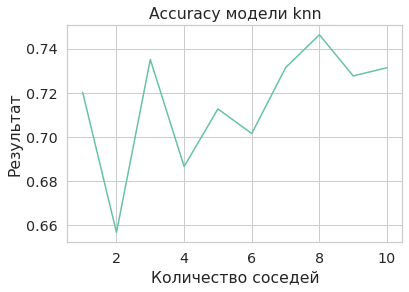

In [ ]:
results = []
for k in range(1, 11):
  results.append(criteria(y_val, knn(x_val, x_train, y_train, k)["predicted"]))
  
plt.plot(range(1, 11), results)
plt.title("Accuracy модели knn")
plt.xlabel("Количество соседей")
plt.ylabel("Результат");

Посчитайте значение предложенного ранее критерия качества для метода ближайшего соседа для значений $k$ от 1 до 10. Постройте график зависимости критерия качества от $k$. Как вы можете пояснить полученные результаты?

#### 6. Выводы

Изменение параметра k влияет на количество рассматриваемых "ближайших" объектов, используемых для определения класса текущего объекта. Нельзя утверждать, что точность предсказаний коррелирует с увеличением или уменьшением числа, это зависит от расположения объектов в n мерном пространстве, насколько объекты разных классов отстоят друг от друга. В данном случае оптиммальным параметром будет k = 8.


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 2

<a target="_blank" href="yelp.com">Yelp</a> — веб-сайт для поиска на местном рынке услуг, например ресторанов или парикмахерских, с возможностью добавлять и просматривать рейтинги и обзоры этих услуг. Для популярных бизнесов имеются сотни обзоров. Для обозревателей на сайте предусмотрены элементы социальной сети.

![Yelp_Logo_No_Outline_Color.jpg](attachment:Yelp_Logo_No_Outline_Color.jpg)

_____________

Вам предоставляется следующая информация о компаниях на Yelp:

Файл `yelp_business.csv`:
* `business_id` — уникальный идентификатор компании;
* `name` — имя компании;
* `address`, `city`, `state` — месторасположении компании;
* `latitude`, `longitude` — географические координаты;
* `categories` — категории услуг компании.

Файл `yelp_review.csv`, содержащий оценки пользователей:
* `business_id` — идентификатор компании, соответствующий файлу `yelp_business.csv`;
* `stars` — поставленная пользователем оценка от 1 до 5.

В целях сокращения объема файла, текстовые отзывы пользователей не были включены.

Оригинальную версию датасета в формате `json` можно посмотреть по <a target="_blank" href="https://www.kaggle.com/yelp-dataset/yelp-dataset/data">ссылке</a>.

_____________

**Что нужно сделать:** 

* Найти город с наибольшим количеством компаний;
* Для этого города определить районы с наиболее качественными услугами. <a target="_blank" href="https://yandex.ru/company/researches/2017/msk_mobile_map">Пример</a> с несколько другой задачей.
* А также найти рестораны с наилучшими отзывами.

------

#### Город с наибольшим количеством компаний

Загрузите данные из файла `yelp_business.csv` с помощью функции `pd.read_csv`. Посмотрите на первые несколько строк с помощью метода `head`.

In [ ]:
import plotly.express as px

In [ ]:
business_df = pd.read_csv("yelp_business.csv", index_col = 0)

In [ ]:
business_df.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


Найдите пять городов, по которым присутствует информация о наибольшем количестве компаний. В таблице должен быть указан город (название) и количество компаний в этом городе.

*Подсказка.* Для выполнения стоит воспользоваться методами `groupby`, `count`, `sort_values`, `head`.

In [ ]:
business_df.groupby("city")["city"].count().sort_values(ascending = False).head()

city
Las Vegas     26775
Phoenix       17213
Toronto       17206
Charlotte      8553
Scottsdale     8228
Name: city, dtype: int64

Пусть `N` &mdash; город с наибольшим количеством компаний. Оставьте в таблице только записи, соответствующие городу `N`. Нанесите все эти компании на график, в котором по оси $x$ отметьте долготу, а по оси $y$ &mdash; широту.

In [ ]:
las_vegas_business = business_df[business_df["city"] == "Las Vegas"]

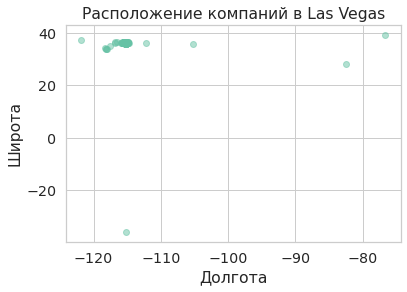

In [ ]:
x_coords = las_vegas_business["longitude"]
y_coords = las_vegas_business["latitude"]

plt.scatter(x_coords, y_coords, alpha = 0.5)
plt.title("Расположение компаний в Las Vegas")
plt.xlabel("Долгота")
plt.ylabel("Широта")
plt.show()

Сам город находится в сгустке точек. Есть какие-то компании, которые приписаны к этому городу, но находятся далеко от него. Избавьтесь от них, подобрав некоторые границы значений широты и долготы. Изобразите все компании на новом графике. На этом графике должны выделяться некоторые улицы. 

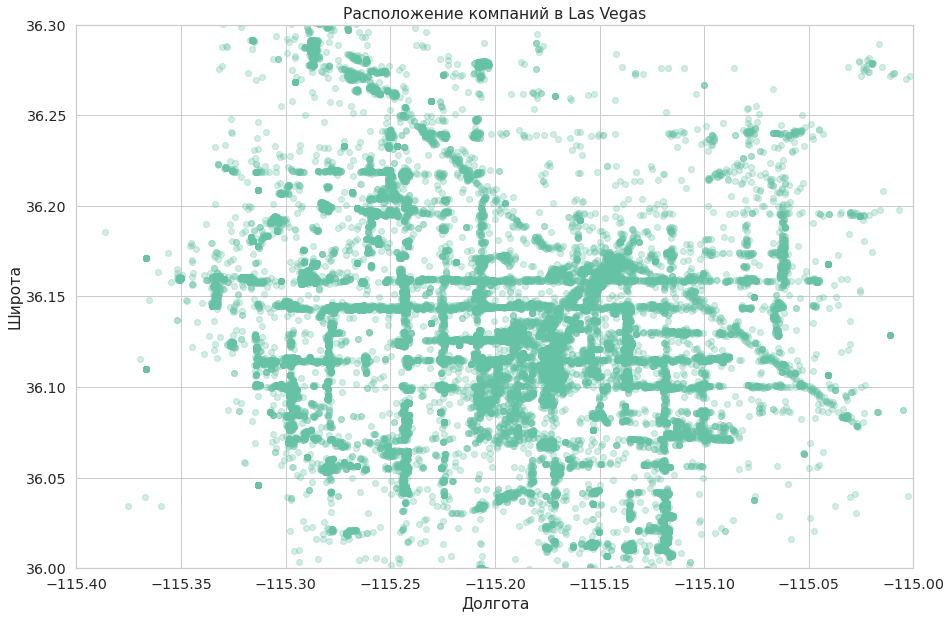

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(x_coords, y_coords, alpha = 0.3)
plt.xlim({-115.4, -115})
plt.ylim({36, 36.3})
plt.title("Расположение компаний в Las Vegas")
plt.xlabel("Долгота")
plt.ylabel("Широта")
plt.show()

Разберитесь с тем, как подгрузить интерактивную карту города в качестве фона графика. Можно пойти двумя следующими способами.
1. Изучить <a href="https://miptstats.github.io/courses/python/11_plotly.html" target="_blank">материалы</a> по библиотеке <a href="https://plotly.com/python/" target="_blank"><b>Plotly</b></a>. Возможно, потребуется также заглянуть в документацию.
1. Поразбираться с библиотекой <a href="https://github.com/python-visualization/folium" target="_blank"><b>Folium</b></a>. Посмотрите множество <a href="https://nbviewer.org/github/python-visualization/folium/tree/main/examples/" target="_blank">примеров</a>, может также помочь <a href="https://proglib.io/p/python-web-map" target="_blank">статья на русском</a>.

*Внимание!* Интерактивная карта может не сохраниться в ноутбуке, а если сохранится, то вес ноутбука может превзойти 20 Мб. Рекомендуется сохранить карту в html и отправить ее отдельным файлом в бот.

In [ ]:
fig = px.density_mapbox(
    las_vegas_business,
    lat='latitude', lon='longitude',
    radius=10, 
    center=dict(lat = las_vegas_business["latitude"].mean(), lon = las_vegas_business["longitude"].mean()),  # центр карты
    zoom=5, 
    mapbox_style="stamen-terrain",
    opacity = 0.3,
    title = "Компании города Ласс Вегас"
)

fig.show()

Если все получилось, вы молодцы! Далее в этой задаче тоже можно делать интерактивные карты.

#### Оценки компаний

Для выполнения задания нужно посчитать среднюю оценку каждой компании, а также количество выставленных оценок.

Загрузите таблицу оценок `yelp_review.csv`.

In [ ]:
review_df = pd.read_csv("yelp_review.csv", index_col = 0)
review_df.head()

,business_id,stars
0,AEx2SYEUJmTxVVB18LlCwA,5
1,VR6GpWIda3SfvPC-lg9H3w,5
2,CKC0-MOWMqoeWf6s-szl8g,5
3,ACFtxLv8pGrrxMm6EgjreA,4
4,s2I_Ni76bjJNK9yG60iD-Q,4


В подгруженной таблице оценок оставьте только компании города `N`. Для этого установите значения `business_id` в качестве индекса у таблицы оценок и воспользуйтесь методом `loc`. 

*Подсказка.* Чтобы индекс снова сделать полем таблицы, можно воспользоваться методом `reset_index`.

In [ ]:
review_df = review_df.set_index("business_id")
las_vegas_review = review_df.loc[las_vegas_business["business_id"]]
review_df = review_df.reset_index()

Теперь посчитайте среднюю оценку каждой компании, а также количество выставленных компании оценок. 

*Подсказка.* Помочь в этом могут функции `groupby` и `aggregate([np.mean, np.size])`.

In [ ]:
las_vegas_review_stats = las_vegas_review.groupby("business_id")["stars"].aggregate([np.mean, np.size])
las_vegas_review_stats.head()

,mean,size
business_id,,
--9e1ONYQuAa-CB_Rrw7Tw,4.088904,1451
--DdmeR16TRb3LsjG0ejrQ,3.200000,5
--WsruI0IGEoeRmkErU5Gg,4.928571,14
--Y7NhBKzLTbNliMUX_wfg,4.875000,8
--e8PjCNhEz32pprnPhCwQ,3.473684,19


Назовите колонки таблицы красивыми именами, изменив `<имя таблицы>.columns`, после чего напечатайте несколько строк полученной таблицы. Красивые имена &mdash; то, что будет понятно простому человеку при чтении ваших результатов. Как именно их назвать &mdash; задача аналитика, то есть в данном случае ваша :)

In [ ]:
las_vegas_review_stats.columns = ["mean_stars", "count_review"]
las_vegas_review_stats.head()

,mean_stars,count_review
business_id,,
--9e1ONYQuAa-CB_Rrw7Tw,4.088904,1451
--DdmeR16TRb3LsjG0ejrQ,3.200000,5
--WsruI0IGEoeRmkErU5Gg,4.928571,14
--Y7NhBKzLTbNliMUX_wfg,4.875000,8
--e8PjCNhEz32pprnPhCwQ,3.473684,19


Соедините две полученные ранее таблицы по компаниям города `N` в одну.
Для этого сначала установите поле `business_id` в качестве индекса в обеих таблицах с помощью `set_index`. В одной из них это уже должно было быть сделано.
В полученной таблице должны получится поля `latitude`, `longitude`, `categories`, `name`, `stars`, `count`.

*Подсказка.* Соединение таблиц можно выполнить с помощью `join`.
Индексы у этих таблиц одинаковые, так что тип джойна не имеет значения.

In [ ]:
las_vegas_business = las_vegas_business.set_index("business_id")
las_vegas = las_vegas_business.join(las_vegas_review_stats)
las_vegas = las_vegas.reset_index()
las_vegas.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,is_open,categories,mean_stars,count_review
0,kCoE3jvEtg6UVz5SOD3GVw,"""BDJ Realty""",Summerlin,"""2620 Regatta Dr, Ste 102""",Las Vegas,NV,89128,36.207430,-115.268460,1,Real Estate Services;Real Estate;Home Services...,4.000000,5
1,OD2hnuuTJI9uotcKycxg1A,"""Soccer Zone""",NaN,"""7240 W Lake Mead Blvd, Ste 4""",Las Vegas,NV,89128,36.197484,-115.249660,1,Shopping;Sporting Goods,1.444444,9
2,VBHEsoXQb2AQ76J9l8h1uQ,"""Alfredo's Jewelry""",Southeast,"""5775 S Eastern, Ste 103""",Las Vegas,NV,89119,36.085051,-115.119421,1,Shopping;Jewelry;Watch Repair;Local Services,4.739130,23
3,1Jp_hmPNUZArNqzpbm7B0g,"""Task Electric""",Spring Valley,"""7260 Cimarron Rd, Ste 130""",Las Vegas,NV,89113,36.056382,-115.269332,1,Home Services;Lighting Fixtures & Equipment;Lo...,4.450000,20
4,DPQnTnNw2PJj7DdENM98Cw,"""Star Nursery""",NaN,"""5340 Boulder Hwy""",Las Vegas,NV,89122,36.105196,-115.056880,1,Nurseries & Gardening;Home & Garden;Shopping,3.680000,25


Изобразите все компании на графике, раскрасив точку в цвет, оттенок которого соответствует средней оценке компании. Прозрачность точки выставляйте не более $0.3$.

In [ ]:
fig = px.density_mapbox(
    las_vegas,  
    lat='latitude', lon='longitude',
    z = "mean_stars", 
    radius=10,  
    center=dict(lat = las_vegas_business["latitude"].mean(), lon = las_vegas_business["longitude"].mean()),  # центр карты
    zoom=5,  
    mapbox_style="stamen-terrain", 
    opacity = 0.3,
    title = "Компании города Ласс Вегас с их средней оценкой"
)
fig.show()

Чтобы получить районы города, то есть разделить город на "клетки", округлите значения широты и долготы, подобрав оптимальный размер района. 

*Подсказка.* Например, можно сделать так
`np.round(долгота*4, decimals=1)*0.25`.

In [ ]:
las_vegas["longitude"] = np.round(las_vegas["longitude"]*4, decimals=1)*0.25
las_vegas["latitude"]  = np.round(las_vegas["latitude"]*4, decimals=1)*0.25

Для получения средней оценки компании по району постройте сводную таблицу при помощи `pd.pivot_table`, взяв в качестве индексов и колонок округленные широту и долготу, а в качестве значений &mdash; оценки. Аггрегирующей функцией является среднее.

Изобразите полученную таблицу при помощи `sns.heatmap`.

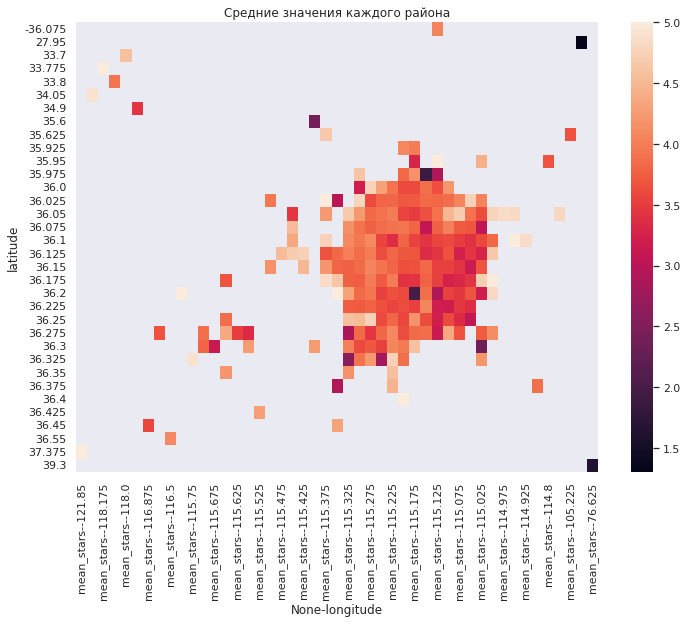

In [ ]:
from pandas.core.arrays.interval import value_counts

sns.set(rc={'figure.figsize':(11.7,8.27)})

las_vegas_piv_table = las_vegas
las_vegas_piv_table = pd.pivot_table(las_vegas_piv_table, values = ["mean_stars"], index = ["latitude"], columns = ["longitude"], aggfunc = "mean")
sns.heatmap(las_vegas_piv_table).set_title("Средние значения каждого района");

Полученный график имеет ряд недостатков. Во-первых, не очень правильно судить о районе, если в нем мало компаний. Во-вторых,  на графике цветовая гамма автоматически подстроилась под минимальное и максимальное значения оценки.

Почему эти недостатки могут быть существенными?

Во-первых, нельзя сопоставлять средние оценки районов с сильноразличающимся количеством компаний, так как средние районов, где компаний мало, неинформативны, с большим количеством компаний они могли бы быть гораздо меньше или больше. 
Во-вторых, вручную настроенная гамма может отразить разброс сильнее, контрастнее выделяя районы относительно друг друга.

Оставьте районы, в которых имеется информация о не менее $30$ компаний. Постройте новый график районов, использовав параметры `vmin` и `vmax` у функции `sns.heatmap`.

In [ ]:
las_vegas_regions = las_vegas.groupby(["longitude", "latitude"])["business_id"].aggregate([np.size])
las_vegas_big_regions = las_vegas_regions[las_vegas_regions["size"] >= 30].reset_index()

las_vegas_big_regions = las_vegas[(las_vegas["longitude"].isin(las_vegas_big_regions["longitude"])) & 
                                  (las_vegas["latitude"].isin(las_vegas_big_regions["latitude"]))] 

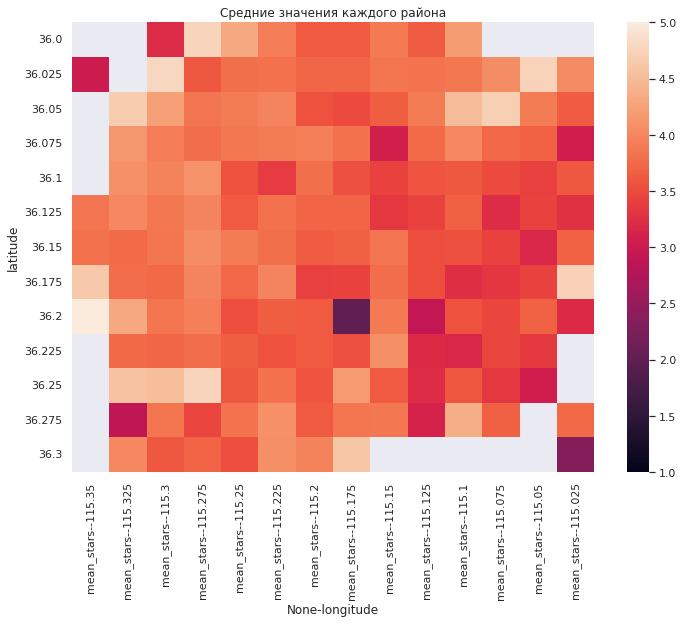

In [ ]:
las_vegas_big_regions_piv_table = pd.pivot_table(las_vegas_big_regions, values = ["mean_stars"], index = ["latitude"], columns = ["longitude"], aggfunc = "mean")
sns.heatmap(las_vegas_big_regions_piv_table, vmin = 1, vmax = 5).set_title("Средние значения каждого района");

Сравните полученный график с предыдущим и сделайте вывод.

**Вывод:** Отбросив районы с маленьким количеством компаний, мы получили возможность детальнее рассмотреть центр, не обращая внимание на отдаленные районы, и понять, что в среднем оценки в центре высокие.

#### Рестораны

Будем считать компанию рестораном, если в поле `categories` *содержится* слово `restaurant`. Обратите внимание, что в анализе данных часто нет четкого формата данных. Например, данное слово может быть написано как с большой буквы, так и с маленькой; может как разделяться `;`, так и не разделяться. При возникновении недопонимания стоит посмотреть данные.

Составьте таблицу, в которой будет информация о всех ресторанах города `N`, для которых имеется не менее $5$ отзывов. Далее постройте heatmap-график районов, в котором каждому району сопоставьте среднюю оценку по ресторанам этого района. Рассматривайте только те районы, в которых есть не менее $10$ ресторанов, для каждого из которых есть не менее $5$ отзывов.

In [ ]:
las_vegas["categories"] = las_vegas["categories"].apply(lambda category: "restaurant" if "restaurant" in category.lower() else category)
las_vegas_restaurant = las_vegas["restaurant" == las_vegas["categories"]]
las_vegas_restaurant_many_reviews = las_vegas_restaurant[las_vegas_restaurant["count_review"] >= 5]

las_vegas_restaurant_regions = las_vegas_restaurant_many_reviews.groupby(["longitude", "latitude"])["business_id"].aggregate([np.size])
las_vegas_restaurant_regions = las_vegas_restaurant_regions[las_vegas_restaurant_regions["size"] >= 10].reset_index()

las_vegas_restaurant_many_reviews = las_vegas_restaurant_many_reviews[(las_vegas_restaurant_many_reviews["longitude"].isin(las_vegas_restaurant_regions["longitude"])) & 
                                                                      (las_vegas_restaurant_many_reviews["latitude"].isin(las_vegas_restaurant_regions["latitude"]))] 

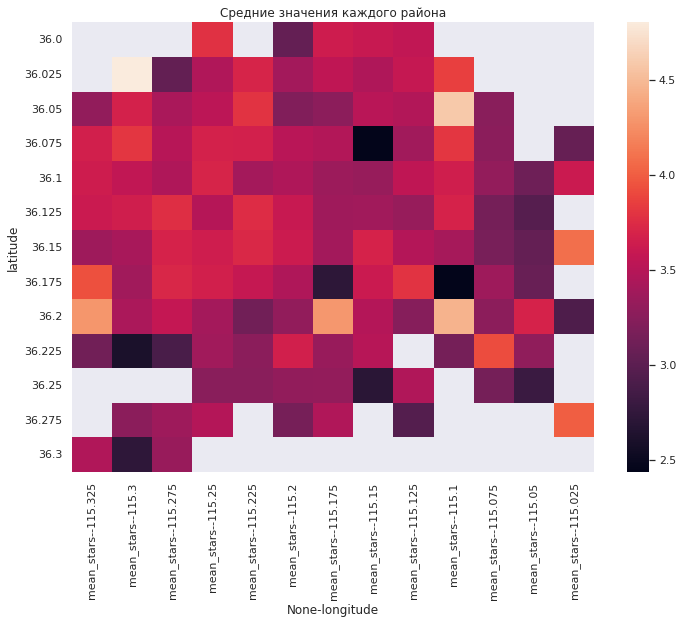

In [ ]:
las_vegas_big_regions_restaurants_piv_table = pd.pivot_table(las_vegas_restaurant_many_reviews, values = ["mean_stars"], index = ["latitude"], columns = ["longitude"])
sns.heatmap(las_vegas_big_regions_restaurants_piv_table).set_title("Средние значения каждого района");

Чем полезны ограничения снизу на количество отзывов для ресторана и количество ресторанов в районе?

**Ответ:** Мы увеличиваем контрастность и, сравнивая районы друг с другом, уверены, что средняя оценка обоснована достаточным количеством отзывов и конкуренцией окружающих ресторанов.

Кот Василий из города `N` очень придирчив к выбору ресторана. Он доверяет только ресторанам с высоким рейтингом, который основывается на большом количестве отзывов. Напечатайте в виде таблицы информацию $10$ ресторанах с самым большим рейтингом в порядке убывания рейтинга. Для каждого из этих ресторанов должно быть не менее $50$ отзывов. По каждому ресторану необходимо вывести следующую информации: название ресторана, средняя оценка, количество отзывов, географические координаты, категории.

In [ ]:
vasilii_restaurants = las_vegas_restaurant_many_reviews[las_vegas_restaurant_many_reviews["count_review"] >= 50].sort_values("mean_stars", ascending = False).head(10)
vasilii_restaurants = vasilii_restaurants[["name", "mean_stars", "count_review", "latitude", "longitude", "categories"]]
vasilii_restaurants

,name,mean_stars,count_review,latitude,longitude,categories
3614,"""Lip Smacking Foodie Tours""",4.966480,179,36.125,-115.175,restaurant
25483,"""Pepito Shack""",4.907692,65,36.150,-115.150,restaurant
16666,"""Bosa Boba Cafe""",4.890909,55,36.125,-115.175,restaurant
25807,"""Garden Grill""",4.868132,91,36.175,-115.275,restaurant
2138,"""Brew Tea Bar""",4.848069,1165,36.050,-115.250,restaurant
19011,"""Poppa Naps BBQ""",4.836538,104,36.125,-115.100,restaurant
12058,"""Zenaida's Cafe""",4.833333,180,36.100,-115.100,restaurant
11961,"""El Frescos Cocina Mexicana""",4.816754,191,36.100,-115.150,restaurant
5360,"""Blaqcat Ultra Hookah Lounge""",4.809524,63,36.150,-115.225,restaurant
23704,"""California Sushi Burrito""",4.807018,57,36.125,-115.200,restaurant


Нанесите на карту все рестораны со средней оценкой не менее $4.7$, которая посчитана по не менее $50$ отзывам. Отдельным цветом отметьте 10 ресторанов, которые вы получили ранее.

In [ ]:
best_restaurants = las_vegas_restaurant_many_reviews[(las_vegas_restaurant_many_reviews["count_review"] >= 50) & (las_vegas_restaurant_many_reviews["mean_stars"] >= 4.7 )]

fig = px.density_mapbox( best_restaurants,
    lat='latitude', lon='longitude',
    z = "mean_stars", 
    radius=10,  
    center=dict(lat = las_vegas_business["latitude"].mean(), lon = las_vegas_business["longitude"].mean()),  # центр карты
    zoom=5,  
    opacity = 1,
    mapbox_style="stamen-terrain",
    title = "Лучшие рестораны Ласс Вегаса"
)

fig.add_scattermapbox(
                      lat = vasilii_restaurants["latitude"],
                      lon = vasilii_restaurants["longitude"],
                      marker_size = 15,
                      marker_color = "rgb(0,0,0)",
                      showlegend = True,
                      name = "Ресторан для Василия")

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))

fig.update_layout(
    autosize=False,
    width=1500,
    height=800,)

fig.show()

Охарактеризуйте кота Василия, а также сделайте общий вывод по задаче.

**Вывод:** Кот Василий очень привередлив, рестораны, которые ему подходя, находятся в самом городе, большая часть в центре. 

Благодаря проделанной работе, мы можем визуально воспринимать данные. Отсеив компании, о которых у нас мало информации (отзывов), мы можем избавиться от выбросов и сделать статистику более информативной. Идея с разделением на районы может дать нам новый категориальный признак, который полезнее чем вещественные ширина и долгота, его можно закодировать, как "средняя оценка по району". 